<a href="https://colab.research.google.com/github/Vcetpreeti/DS_internship/blob/main/Blackfriday_DA_ipnyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv("train.csv")
print(df)

       User_ID Product_ID Gender    Age  Occupation City_Category  \
0      1000001  P00069042      F   0-17        10.0             A   
1      1000001  P00248942      F   0-17        10.0             A   
2      1000001  P00087842      F   0-17        10.0             A   
3      1000001  P00085442      F   0-17        10.0             A   
4      1000002  P00285442      M    55+        16.0             C   
...        ...        ...    ...    ...         ...           ...   
22584  1003539  P00135242      F  26-35         4.0             A   
22585  1003539  P00151342      F  26-35         4.0             A   
22586  1003539  P00015942      F  26-35         4.0             A   
22587  1003539  P00303942      F  26-35         4.0             A   
22588  1003539  P00005042      F    26-         NaN           NaN   

      Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                              2             0.0                 3.0   
1                          

In [2]:
df.isnull().sum()

User_ID                           0
Product_ID                        0
Gender                            0
Age                               0
Occupation                        1
City_Category                     1
Stay_In_Current_City_Years        1
Marital_Status                    1
Product_Category_1                1
Product_Category_2             7215
Product_Category_3            15803
Purchase                          1
dtype: int64

In [3]:
df.shape

(22589, 12)

In [4]:
#DEALING WITH MEASING VALUES
df['Product_Category_2'].fillna((df['Product_Category_2'].mean()), inplace=True) #Imputing Neurimical Values


In [5]:
df['Product_Category_1'].fillna((df['Product_Category_1'].mean()), inplace=True)
df.isnull().sum()

User_ID                           0
Product_ID                        0
Gender                            0
Age                               0
Occupation                        1
City_Category                     1
Stay_In_Current_City_Years        1
Marital_Status                    1
Product_Category_1                0
Product_Category_2                0
Product_Category_3            15803
Purchase                          1
dtype: int64

In [6]:
df['Product_Category_3'].fillna((df['Product_Category_3'].mean()), inplace=True)
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    1
City_Category                 1
Stay_In_Current_City_Years    1
Marital_Status                1
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      1
dtype: int64

In [7]:
df['Purchase'].fillna((df['Purchase'].mean()), inplace=True)
df['Occupation'].fillna((df['Occupation'].mean()), inplace=True)
df['City_Category'].fillna(df['City_Category'].mode()[0], inplace=True)

df['Marital_Status'].fillna((df['Marital_Status'].mean()), inplace=True)
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    1
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [8]:
Q1 = df['Product_Category_1'].quantile(0.25)
Q3 = df['Product_Category_1'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print(upper)
print(lower)

out1=df[df['Product_Category_1'] < lower].values
out2=df[df['Product_Category_1'] > upper].values

df['Product_Category_1'].replace(out1,lower,inplace=True)
df['Product_Category_1'].replace(out2,upper,inplace=True)

print(df['Product_Category_1'])
df

7.0
18.5
-9.5
0         3.000000
1         1.000000
2        12.000000
3        12.000000
4         8.000000
           ...    
22584     4.000000
22585     7.000000
22586     6.000000
22587     8.000000
22588     5.303081
Name: Product_Category_1, Length: 22589, dtype: float64


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.000000,A,2,0.000000,3.000000,9.865032,12.73578,8370.000000
1,1000001,P00248942,F,0-17,10.000000,A,2,0.000000,1.000000,6.000000,14.00000,15200.000000
2,1000001,P00087842,F,0-17,10.000000,A,2,0.000000,12.000000,9.865032,12.73578,1422.000000
3,1000001,P00085442,F,0-17,10.000000,A,2,0.000000,12.000000,14.000000,12.73578,1057.000000
4,1000002,P00285442,M,55+,16.000000,C,4+,0.000000,8.000000,9.865032,12.73578,7969.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
22584,1003539,P00135242,F,26-35,4.000000,A,1,1.000000,4.000000,5.000000,13.00000,2768.000000
22585,1003539,P00151342,F,26-35,4.000000,A,1,1.000000,7.000000,9.865032,12.73578,16677.000000
22586,1003539,P00015942,F,26-35,4.000000,A,1,1.000000,6.000000,10.000000,13.00000,16123.000000
22587,1003539,P00303942,F,26-35,4.000000,A,1,1.000000,8.000000,13.000000,12.73578,3896.000000


In [9]:
Q1 = df['Product_Category_2'].quantile(0.25)
Q3 = df['Product_Category_2'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print(upper)
print(lower)

out1=df[df['Product_Category_2'] < lower].values
out2=df[df['Product_Category_2'] > upper].values

df['Product_Category_2'].replace(out1,lower,inplace=True)
df['Product_Category_2'].replace(out2,upper,inplace=True)

print(df['Product_Category_2'])
df

6.0
23.0
-1.0
0         9.865032
1         6.000000
2         9.865032
3        14.000000
4         9.865032
           ...    
22584     5.000000
22585     9.865032
22586    10.000000
22587    13.000000
22588     9.865032
Name: Product_Category_2, Length: 22589, dtype: float64


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.000000,A,2,0.000000,3.000000,9.865032,12.73578,8370.000000
1,1000001,P00248942,F,0-17,10.000000,A,2,0.000000,1.000000,6.000000,14.00000,15200.000000
2,1000001,P00087842,F,0-17,10.000000,A,2,0.000000,12.000000,9.865032,12.73578,1422.000000
3,1000001,P00085442,F,0-17,10.000000,A,2,0.000000,12.000000,14.000000,12.73578,1057.000000
4,1000002,P00285442,M,55+,16.000000,C,4+,0.000000,8.000000,9.865032,12.73578,7969.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
22584,1003539,P00135242,F,26-35,4.000000,A,1,1.000000,4.000000,5.000000,13.00000,2768.000000
22585,1003539,P00151342,F,26-35,4.000000,A,1,1.000000,7.000000,9.865032,12.73578,16677.000000
22586,1003539,P00015942,F,26-35,4.000000,A,1,1.000000,6.000000,10.000000,13.00000,16123.000000
22587,1003539,P00303942,F,26-35,4.000000,A,1,1.000000,8.000000,13.000000,12.73578,3896.000000


In [ ]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.842329,12.668243,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.842329,12.668243,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,12.668243,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.842329,12.668243,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,9.842329,12.668243,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,9.842329,12.668243,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,9.842329,12.668243,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,9.842329,12.668243,365


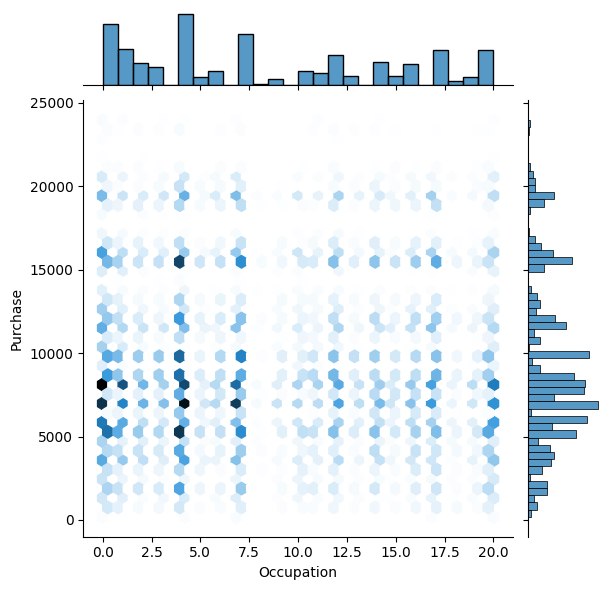

In [10]:
import seaborn as sns
sns.jointplot(x='Occupation',y='Purchase',
              data=df, kind='hex'
             )

In [11]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.strip('+')

In [ ]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.842329,12.668243,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.842329,12.668243,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,12.668243,1057
4,1000002,P00285442,M,55,16,C,4,0,8,9.842329,12.668243,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,9.842329,12.668243,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,9.842329,12.668243,371
550065,1006036,P00375436,F,26-35,15,B,4,1,20,9.842329,12.668243,137
550066,1006038,P00375436,F,55,1,C,2,0,20,9.842329,12.668243,365


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


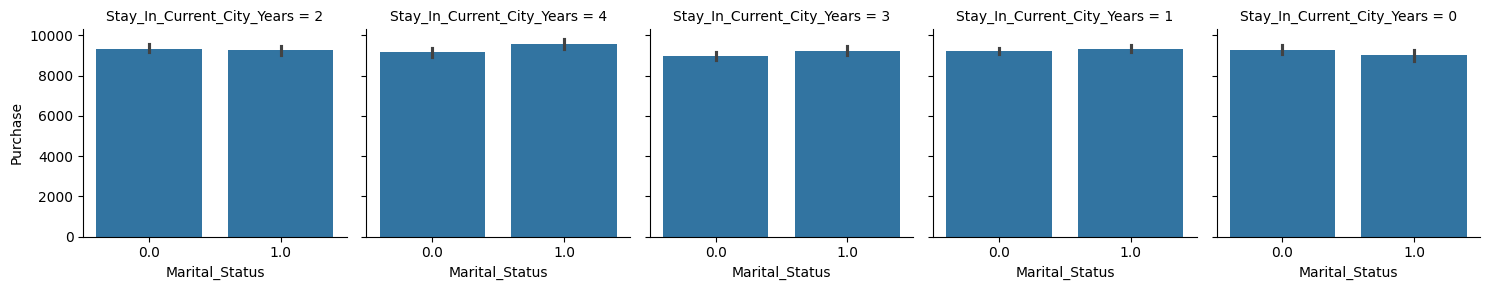

In [12]:


g = sns.FacetGrid(df,col="Stay_In_Current_City_Years")
g.map(sns.barplot, "Marital_Status", "Purchase");

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


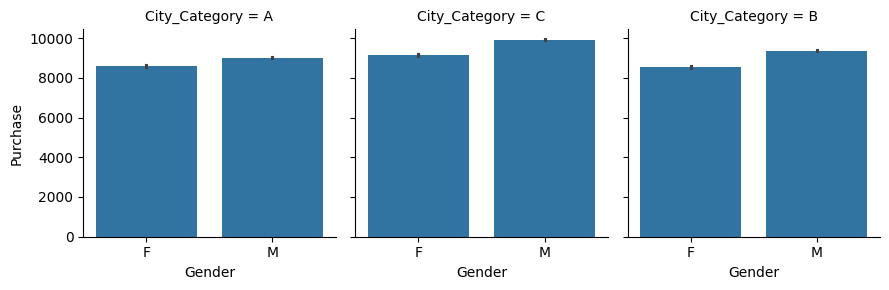

In [ ]:
g = sns.FacetGrid(df,col="City_Category")
g.map(sns.barplot, "Gender", "Purchase");

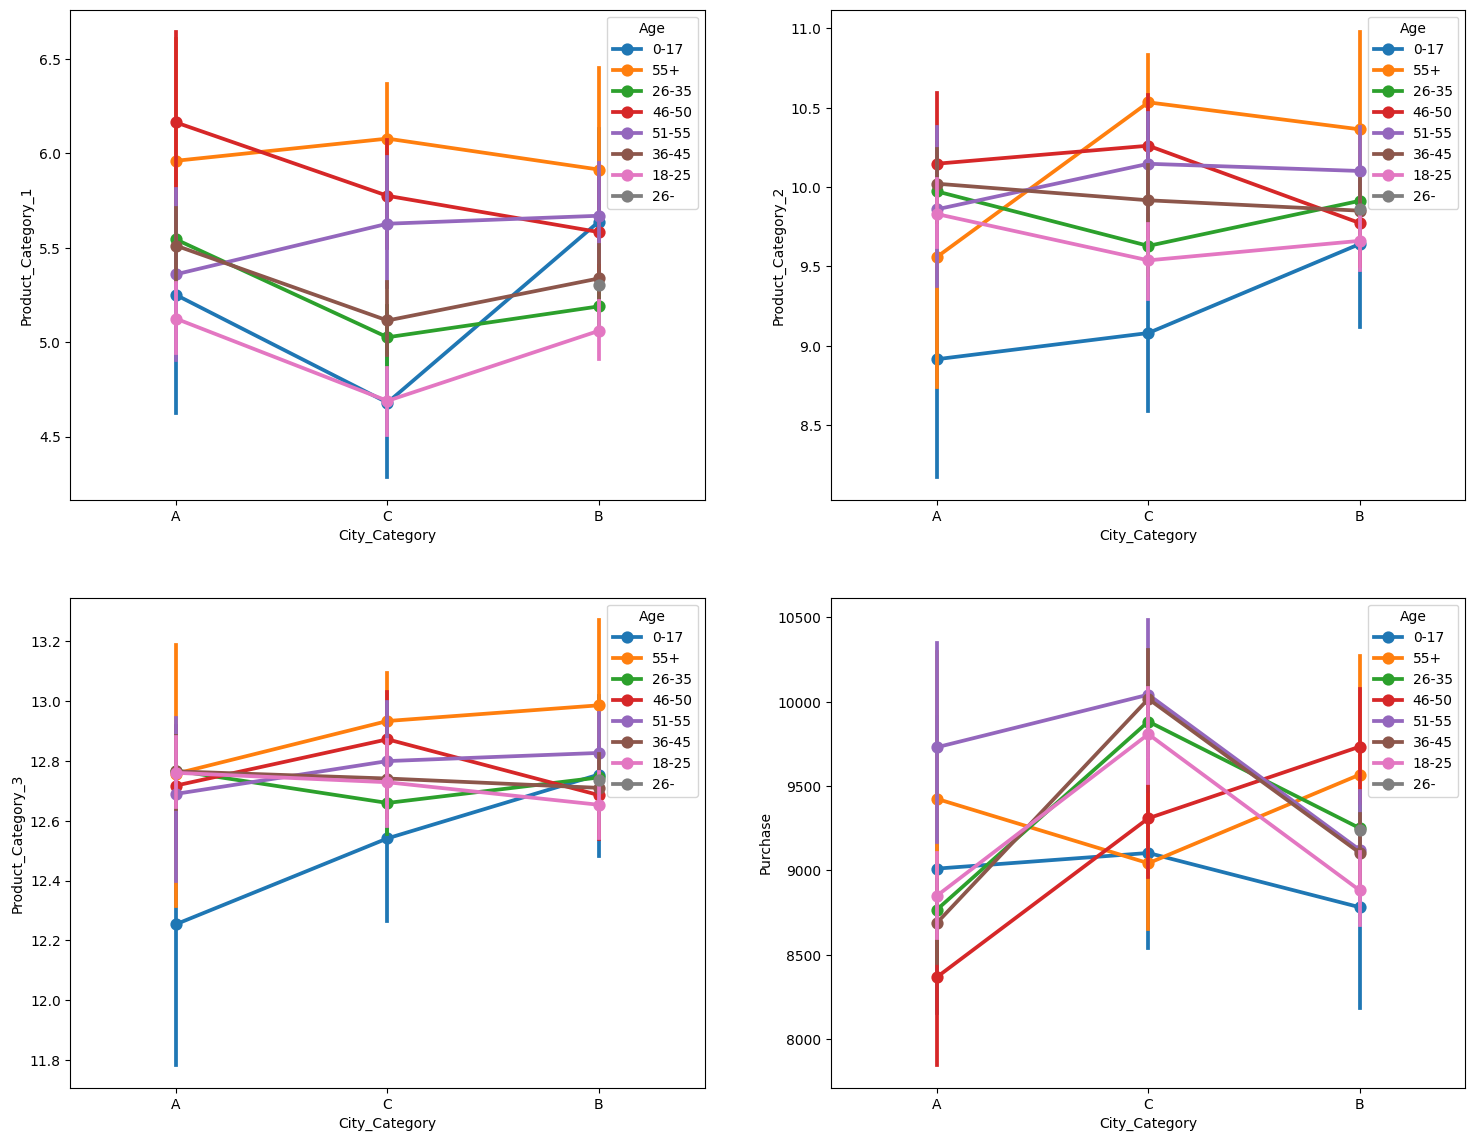

In [13]:

import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(18,14))
ax = sns.pointplot(y='Product_Category_1', x='City_Category',hue='Age',
                 data=df,
                 ax=axes[0,0]
                )
ax = sns.pointplot(y='Product_Category_2', x='City_Category',hue='Age',
                 data=df,
                 ax=axes[0,1]
                )
ax = sns.pointplot(y='Product_Category_3', x='City_Category', hue='Age',
                 data=df,
                 ax=axes[1,0]
                )
ax = sns.pointplot(y='Purchase', x='City_Category', hue='Age',
                 data=df,
                 ax=axes[1,1]
                )

In [14]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    1
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [15]:
x=df[['Occupation','Product_Category_1','Product_Category_2','Product_Category_3']]
y=df['Purchase']

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x = pca.fit_transform(x)

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer # Import SimpleImputer to handle missing values
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor # Import regressor for continuous target

df=pd.read_csv("train.csv")
df['Product_Category_1'].fillna((df['Product_Category_1'].mean()), inplace=True)
df['Product_Category_2'].fillna((df['Product_Category_2'].mean()), inplace=True)
df['Product_Category_3'].fillna((df['Product_Category_3'].mean()), inplace=True)

# Handle missing values in 'Purchase' column (target variable)
df['Purchase'].fillna((df['Purchase'].mean()), inplace=True) # Or any other suitable strategy

x=df[['Occupation','Product_Category_1','Product_Category_2','Product_Category_3']]
y=df['Purchase']

# Impute missing values using the most frequent value for each column
imputer = SimpleImputer(strategy='most_frequent')
x = imputer.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)

# Use GradientBoostingRegressor for continuous target variable
gbm = GradientBoostingRegressor(n_estimators=10) # Changed to Regressor

gbm.fit(X_train, y_train)

y_pred = gbm.predict(X_test)

# You might want to use different metrics for regression tasks, such as mean squared error
from sklearn.metrics import mean_squared_error
print("GBM Mean Squared Error:", mean_squared_error(y_test, y_pred))

GBM Mean Squared Error: 14566477.628182944


In [18]:
df.isna().sum()

User_ID                       0
Product_ID                    1
Gender                        1
Age                           1
Occupation                    1
City_Category                 1
Stay_In_Current_City_Years    1
Marital_Status                1
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64